ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

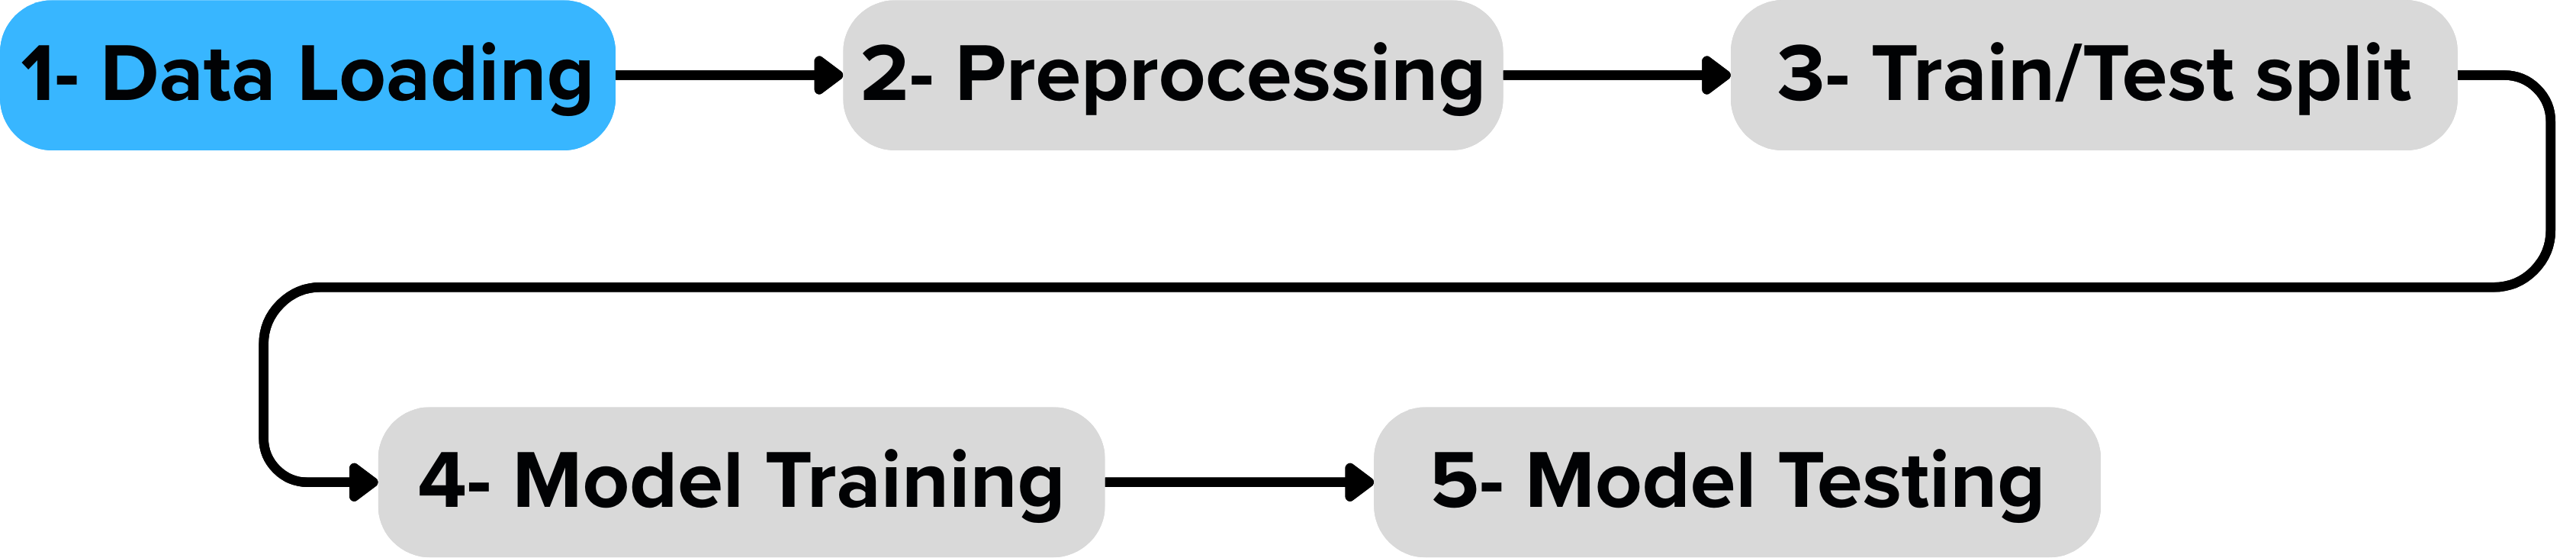

In [5]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [53]:
# Load Dataset

df = pd.read_csv("train.csv")

# Display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check Missing Values

In [54]:
# Check all values
print(df.isna())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [15]:
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Check duplicate rows

In [16]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

### No. of rows and columns

In [55]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (891, 12) 

number of rows:  891
number of columns:  12


### Data type of columns

In [18]:
# viewing the data types of columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Cabin              str
Embarked           str
dtype: object

In [22]:
# 'Fare' is already a float, but if it were a string with '$', you'd do:
df['Fare'] = df['Fare'].astype(str).replace(r'[\$,]', '', regex=True)
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Check the results
print(df[['Name', 'Fare']].head())

                                                Name     Fare
0                            Braund, Mr. Owen Harris   7.2500
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  71.2833
2                             Heikkinen, Miss. Laina   7.9250
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  53.1000
4                           Allen, Mr. William Henry   8.0500


### Descriptive summary Statistics

In [23]:
# Statistical summary
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Univariate Analysis

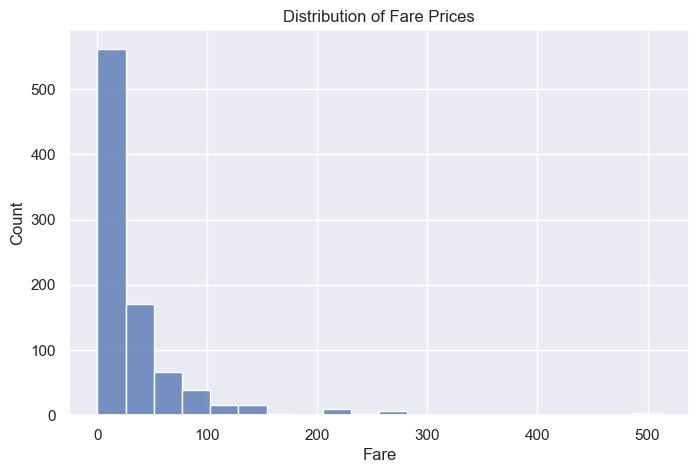

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=20)
plt.title("Distribution of Fare Prices")
plt.show()

Shows the distribution of ticket prices (Fare).

Right Skew: Indicates a high frequency of low fares and a few high-priced outliers.

### Distribution of survived

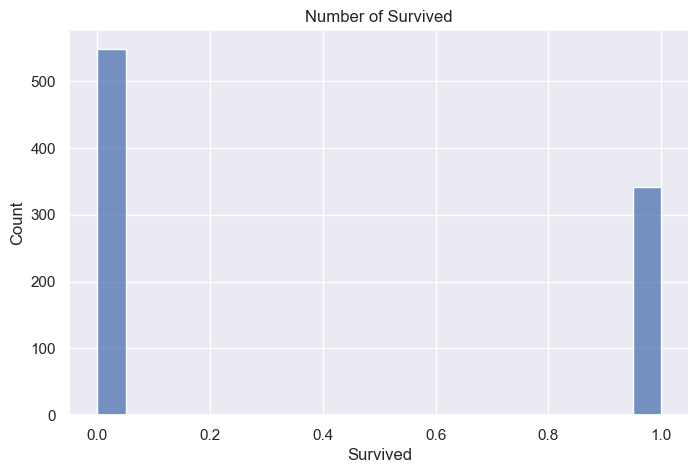

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['Survived'], bins=20)
plt.title("Number of Survived")
plt.show()

## Bivariate Analysis

### Total Revenue per port

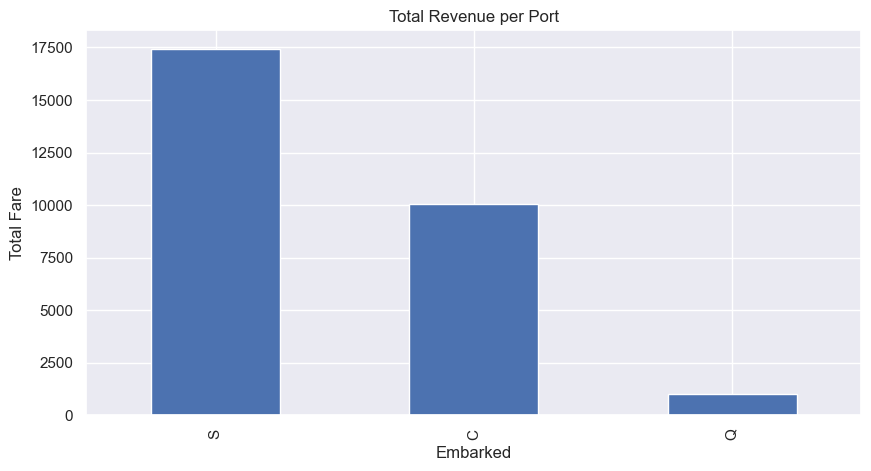

Embarked
S    17439.3988
C    10072.2962
Q     1022.2543
Name: Fare, dtype: float64

In [31]:
country_revenue = df.groupby('Embarked')['Fare'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title("Total Revenue per Port")
plt.ylabel("Total Fare")
plt.show()

country_revenue

### Survival Rate by Class

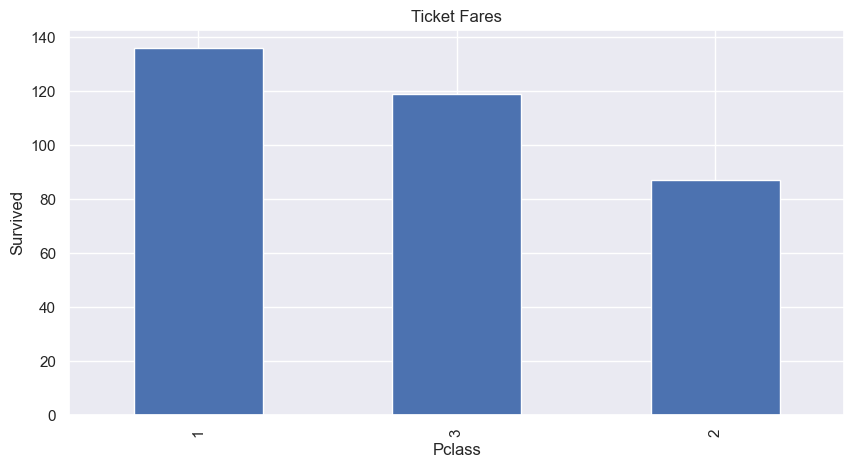

Pclass
1    136
3    119
2     87
Name: Survived, dtype: int64

In [40]:
Survival_Rate = df.groupby('Pclass')['Survived'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
Survival_Rate.plot(kind='bar')
plt.title("Ticket Fares")
plt.ylabel("Survived")
plt.show()

Survival_Rate

### Survival Rate by Family Size

In [42]:
FamilySize = df.groupby('SibSp')['Parch'].sum().sort_values(ascending=False)

FamilySize.head(10)

SibSp
1    137
0    113
4     27
3     21
2     18
8     14
5     10
Name: Parch, dtype: int64

### Family Size vs Cost

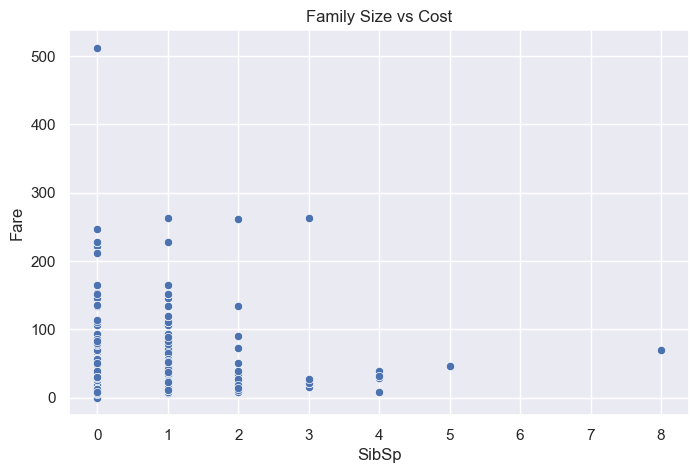

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='SibSp', y='Fare', data=df)
plt.title("Family Size vs Cost")
plt.show()


### Correlation Matrix

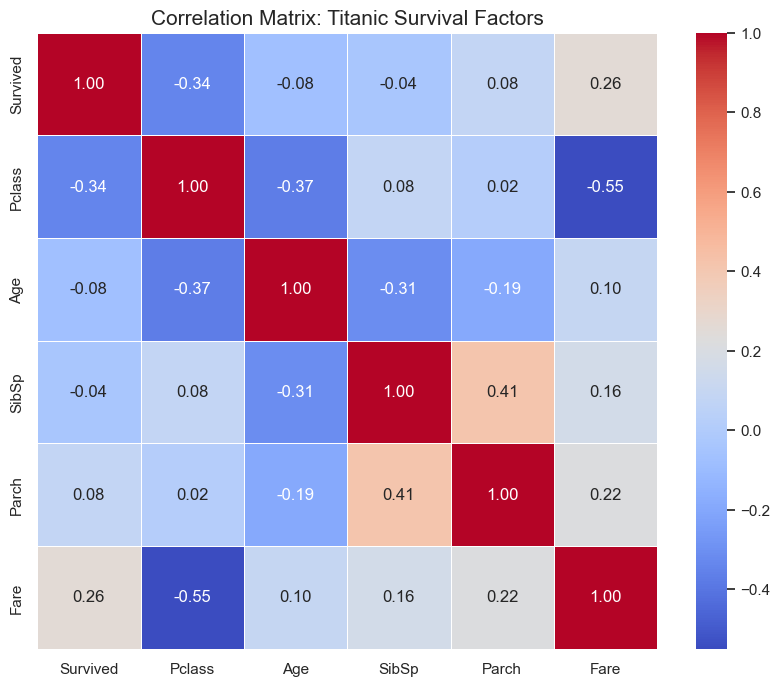

In [ ]:
# 1. Select the key numeric columns 
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = df[numeric_cols].corr()

# 2. Setup the visualization
plt.figure(figsize=(10, 8))

# 3. Create the heatmap with a 'coolwarm' color map
# Annot=True shows the math inside the boxes
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# 4. Update the title
plt.title("Correlation Matrix: Titanic Survival Factors", fontsize=15)
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Survived-based Analysis

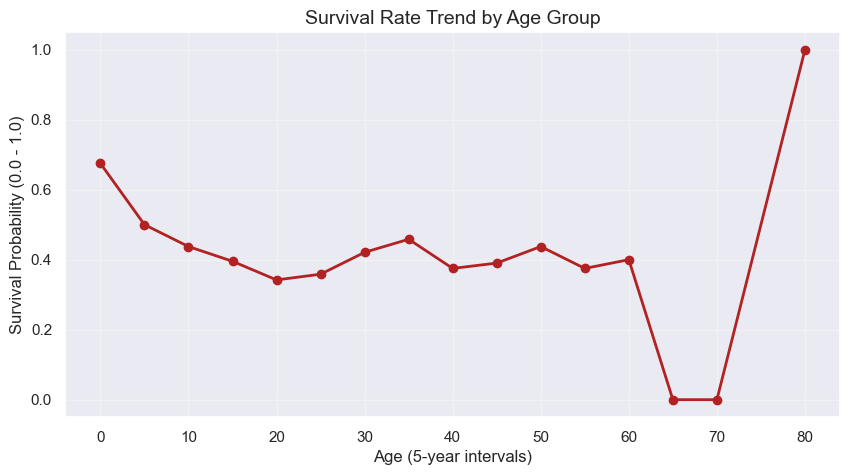

In [52]:
# 1. Create age groups (like months) to smooth out the line
# We'll group by every 5 years so the line isn't too messy
df['AgeGroup'] = (df['Age'] // 5) * 5

# 2. Calculate the survival rate for each age group
age_trend = df.groupby('AgeGroup')['Survived'].mean()

# 3. Setup the visualization 
plt.figure(figsize=(10,5))
age_trend.plot(kind='line', marker='o', color='firebrick', linewidth=2)

# 4. Update the labels for the Titanic context
plt.title("Survival Rate Trend by Age Group", fontsize=14)
plt.xlabel("Age (5-year intervals)")
plt.ylabel("Survival Probability (0.0 - 1.0)")
plt.grid(True, alpha=0.3) # Adds a grid like many financial charts

plt.show()